In [1]:
import numpy as np
import matplotlib.pyplot as plt

from functions import registry
from algorithms import BlindSearch, HillClimbing
from plots import surface_grid, plot_surface_and_path, plot_convergence, plot_neighbors_on_surface, plot_surface, plot_contour, plot_1d_slice

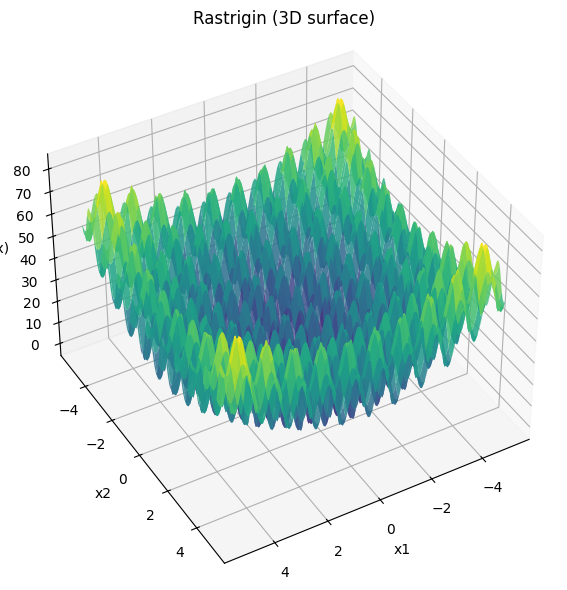

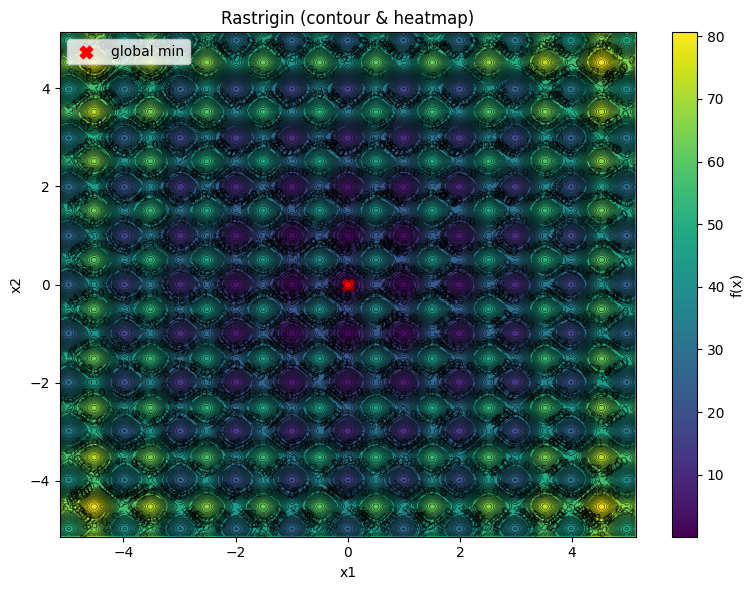

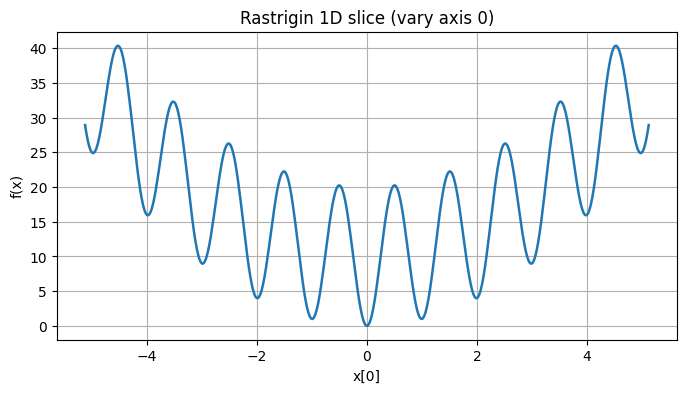

In [2]:
fn_name = "Rastrigin"
plot_surface(fn_name, grid=140, elev=40, azim=60)
plot_contour(fn_name, grid=300, levels=80)
plot_1d_slice(fn_name, axis=0)

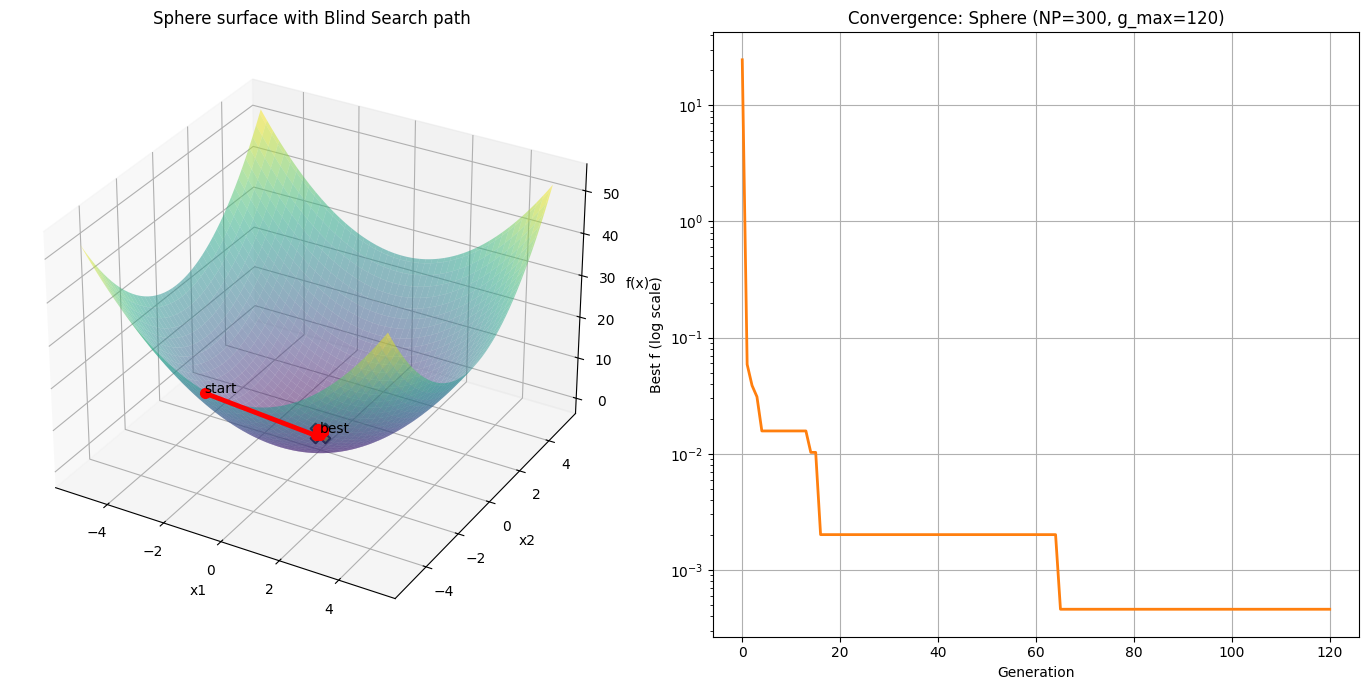

Best found: [ 0.00196659 -0.0213165 ] f = 0.00045826083880856904


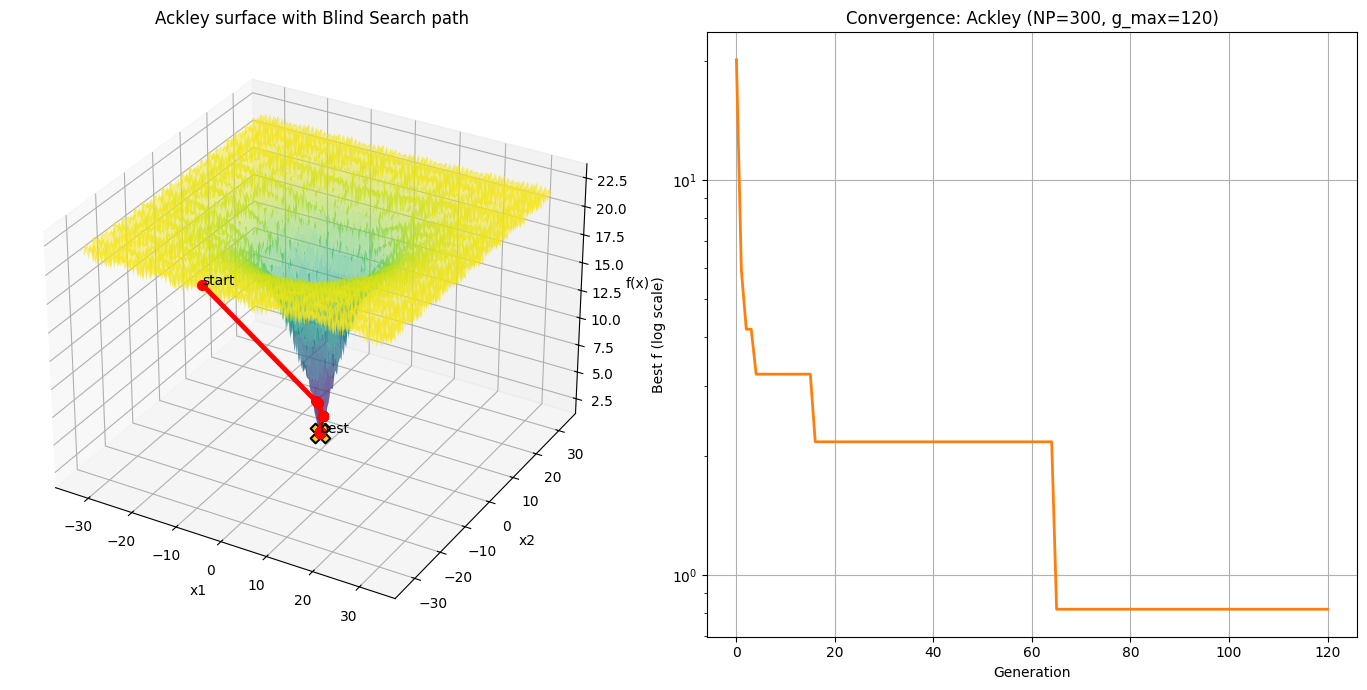

Best found: [ 0.01258616 -0.13642563] f = 0.8185350050829823


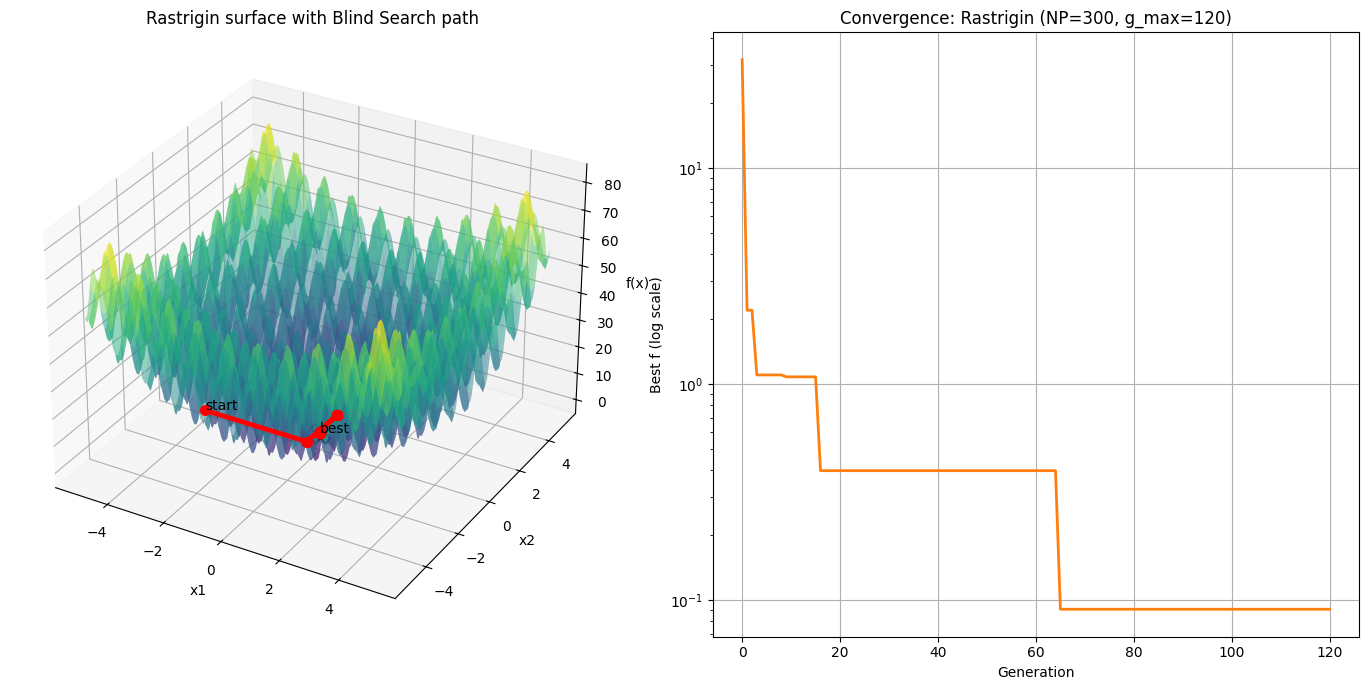

Best found: [ 0.00196659 -0.0213165 ] f = 0.09078131257441058


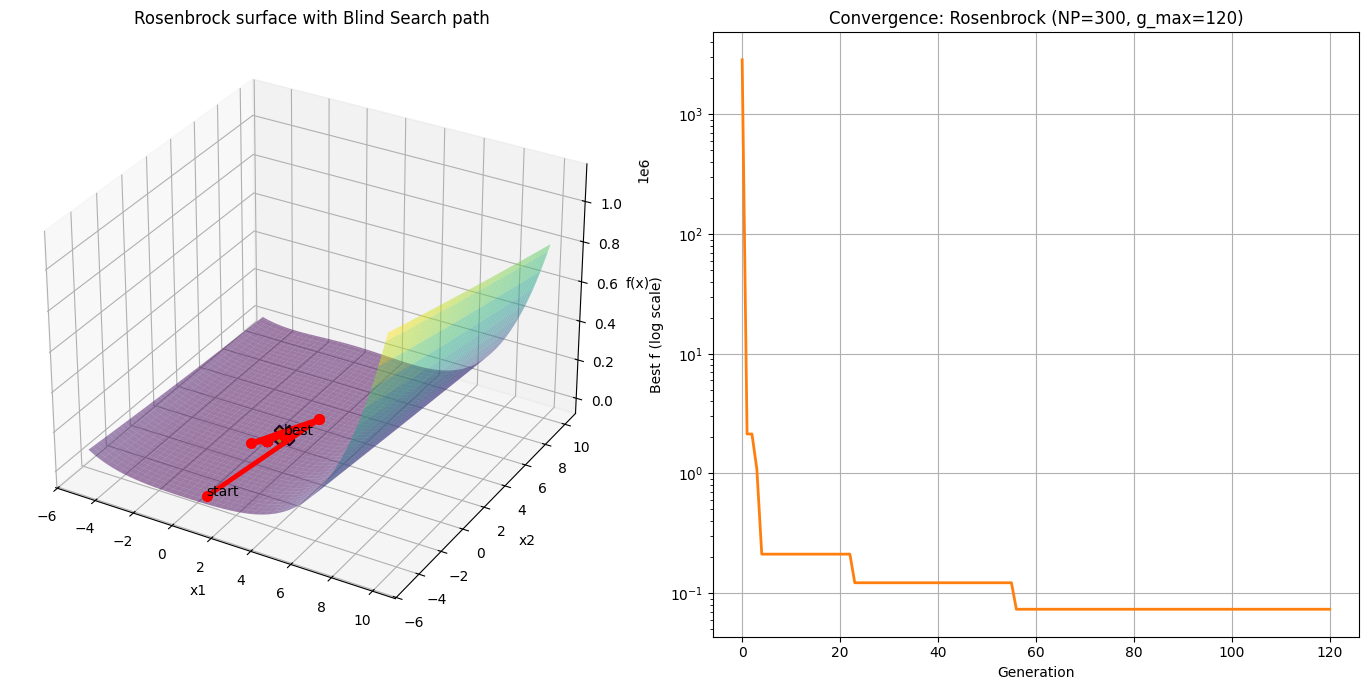

Best found: [1.20961415 1.48029165] f = 0.07326556125789868


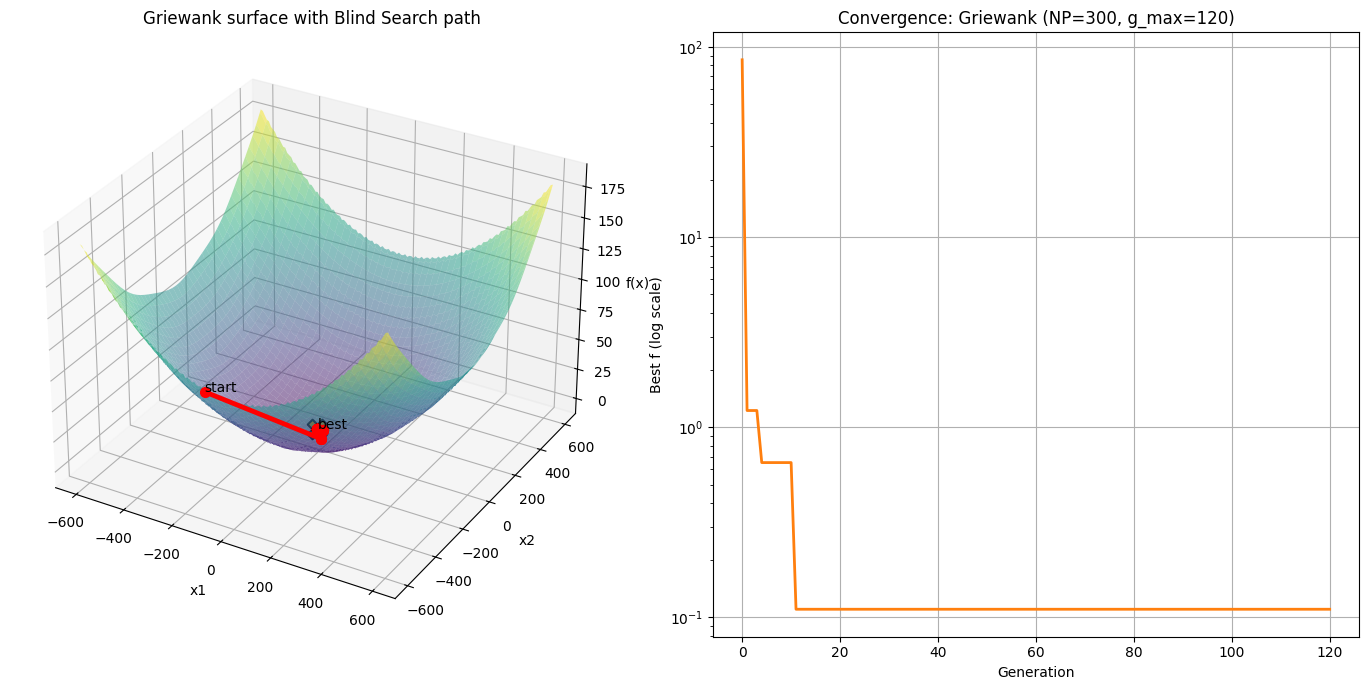

Best found: [-15.42509499   4.59996667] f = 0.1104320699389697


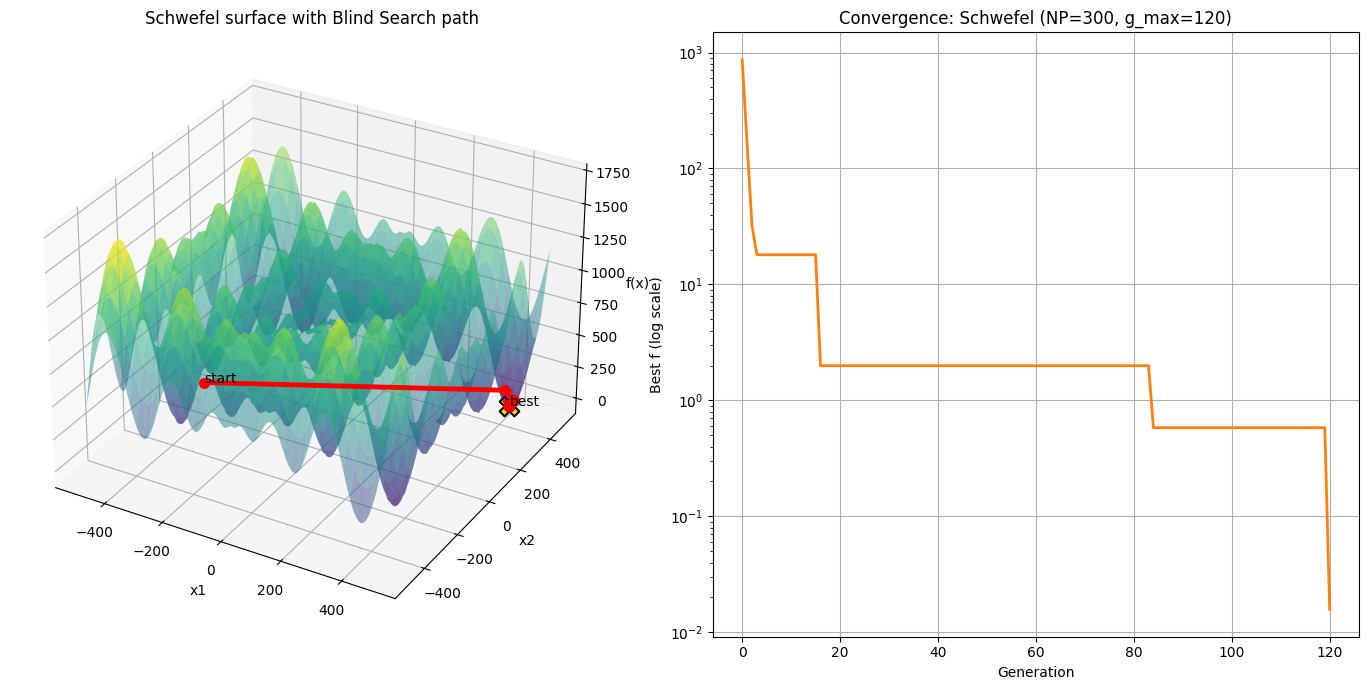

Best found: [420.70034041 421.1993023 ] f = 0.015822960617924764


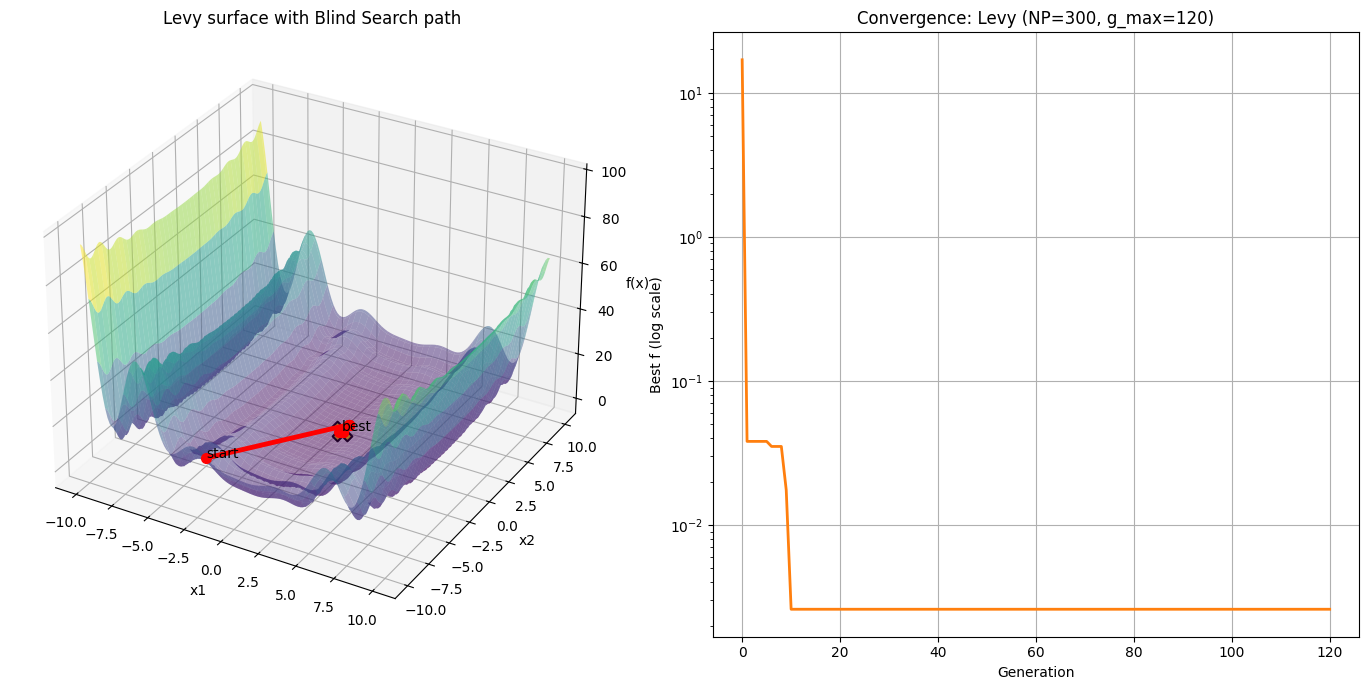

Best found: [1.00548184 0.8058663 ] f = 0.0026016141896642933


e:\Code\SCHOOL\BIA\plots.py:158: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


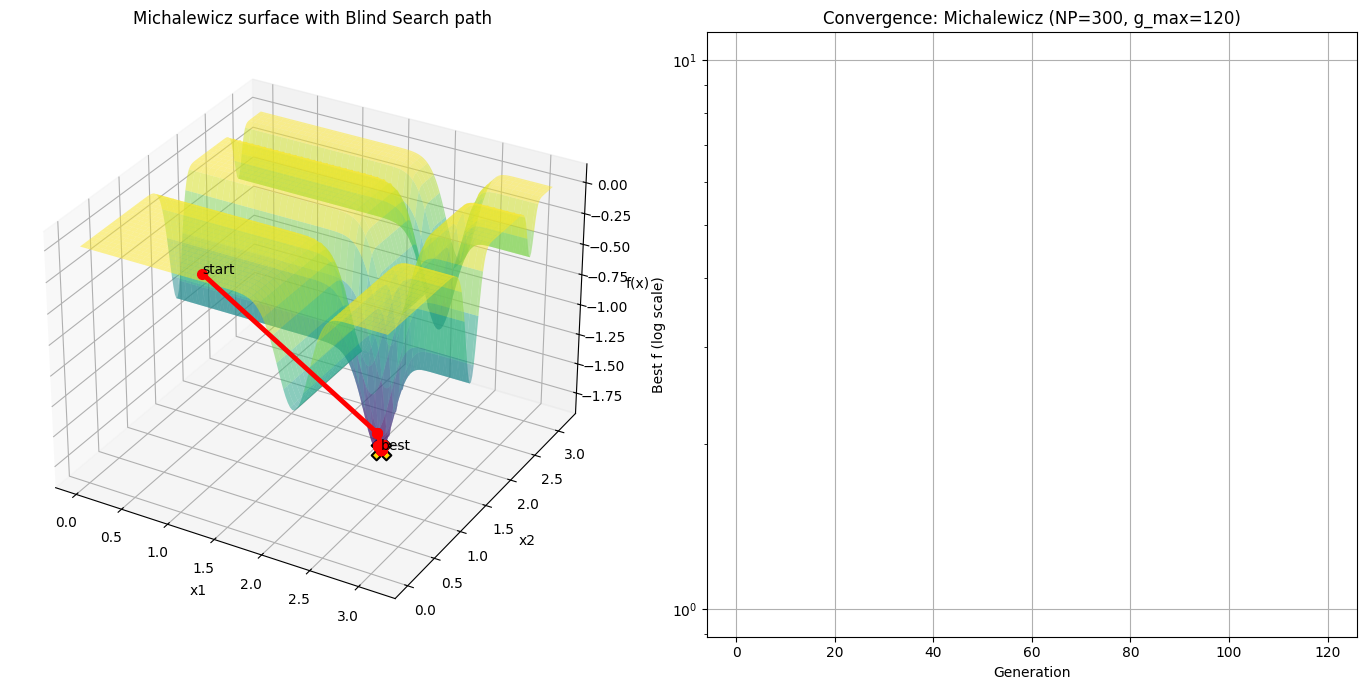

Best found: [2.22328924 1.57251255] f = -1.7943989358679646


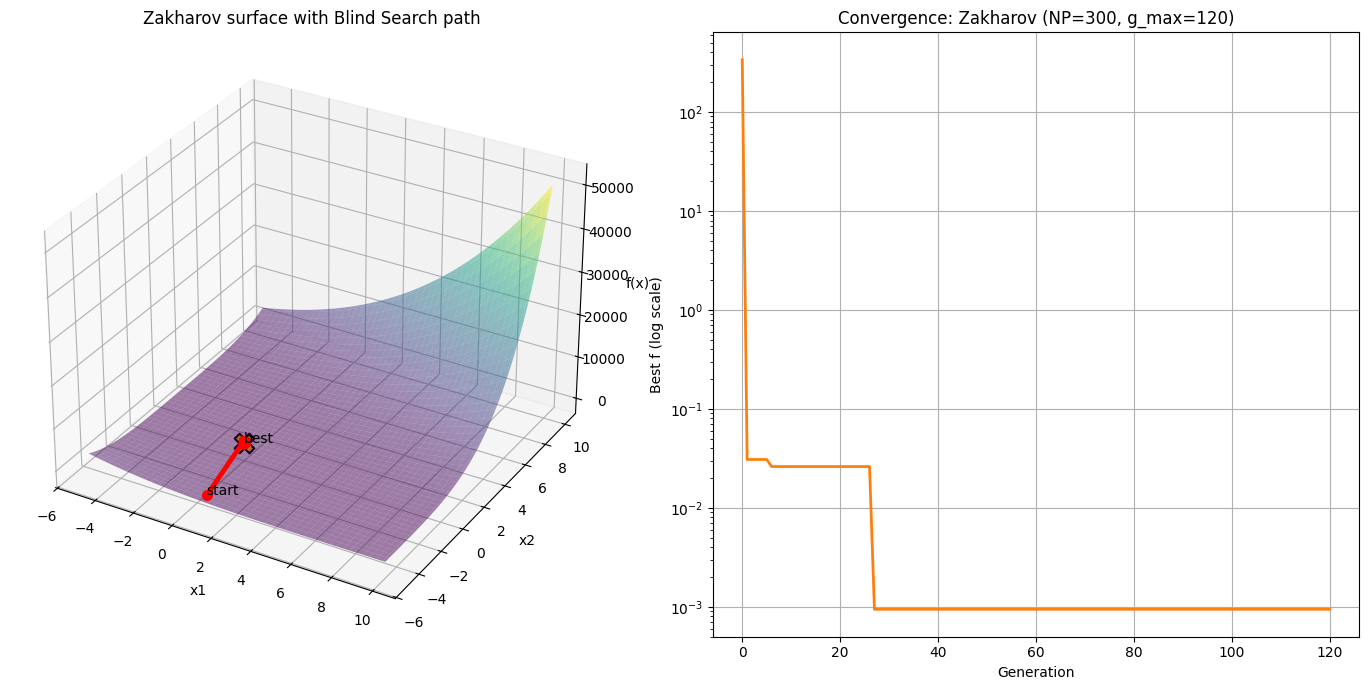

Best found: [-0.00122407 -0.02142222] f = 0.0009461540581243943


In [3]:
funcs = ["Sphere", "Ackley", "Rastrigin", "Rosenbrock", "Griewank", "Schwefel", "Levy", "Michalewicz", "Zakharov"]

# parameters
NP = 300
g_max = 120
seed = 888
grid = 140

for fn_name in funcs:
    bf = registry[fn_name]
    lb, ub = bf.bounds

    # run blind search
    bs = BlindSearch(func=bf.func, bounds=(lb, ub), NP=NP, g_max=g_max, seed=seed)
    best_x, best_f, history = bs.run(record_history=True)

    # prepare surface grid
    X, Y, Z = surface_grid(bf.func, lb, ub, grid_points=grid)

    # plotting
    fig = plt.figure(figsize=(14, 7))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')

    # plot surface with modest alpha (so path shows)
    plot_surface_and_path(ax1, X, Y, Z, path_points=np.array(history["best_x"]), surf_alpha=0.5)
    ax1.set_title(f"{fn_name} surface with Blind Search path")
    ax1.set_xlabel("x1"); ax1.set_ylabel("x2"); ax1.set_zlabel("f(x)")

    ax2 = fig.add_subplot(1, 2, 2)
    plot_convergence(ax2, history["best_f"])
    ax2.set_title(f"Convergence: {fn_name} (NP={NP}, g_max={g_max})")

    plt.tight_layout()
    plt.show()

    print("Best found:", best_x, "f =", best_f)

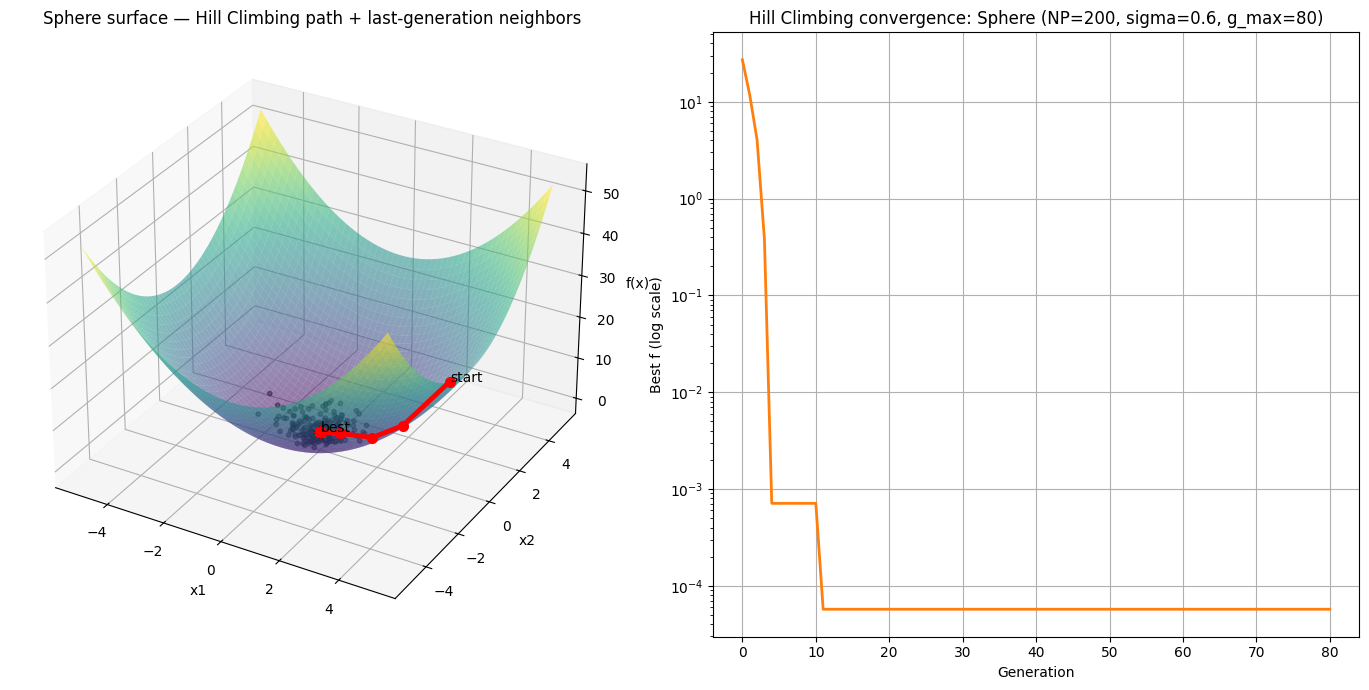

Best found: [ 0.00297845 -0.00695946] f = 5.730532318043135e-05


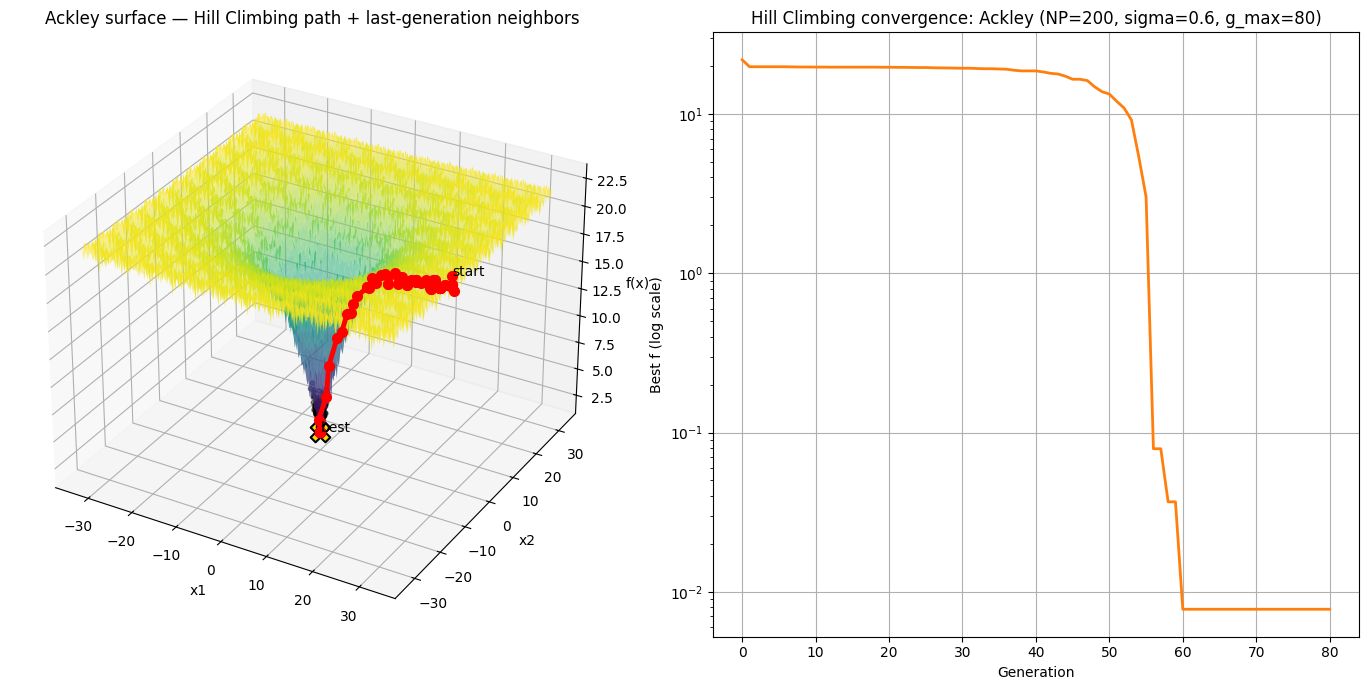

Best found: [-0.00243795  0.00111031] f = 0.007768085384740164


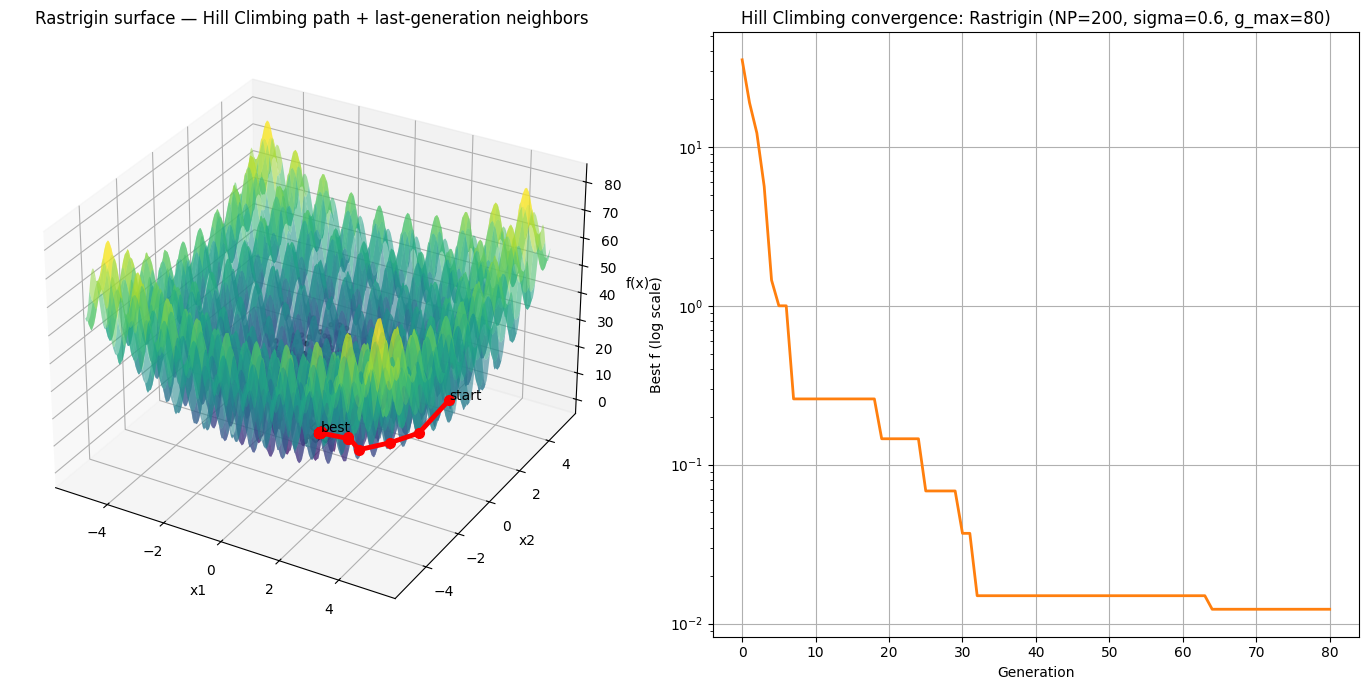

Best found: [ 0.00411818 -0.0067118 ] f = 0.012300312809085057


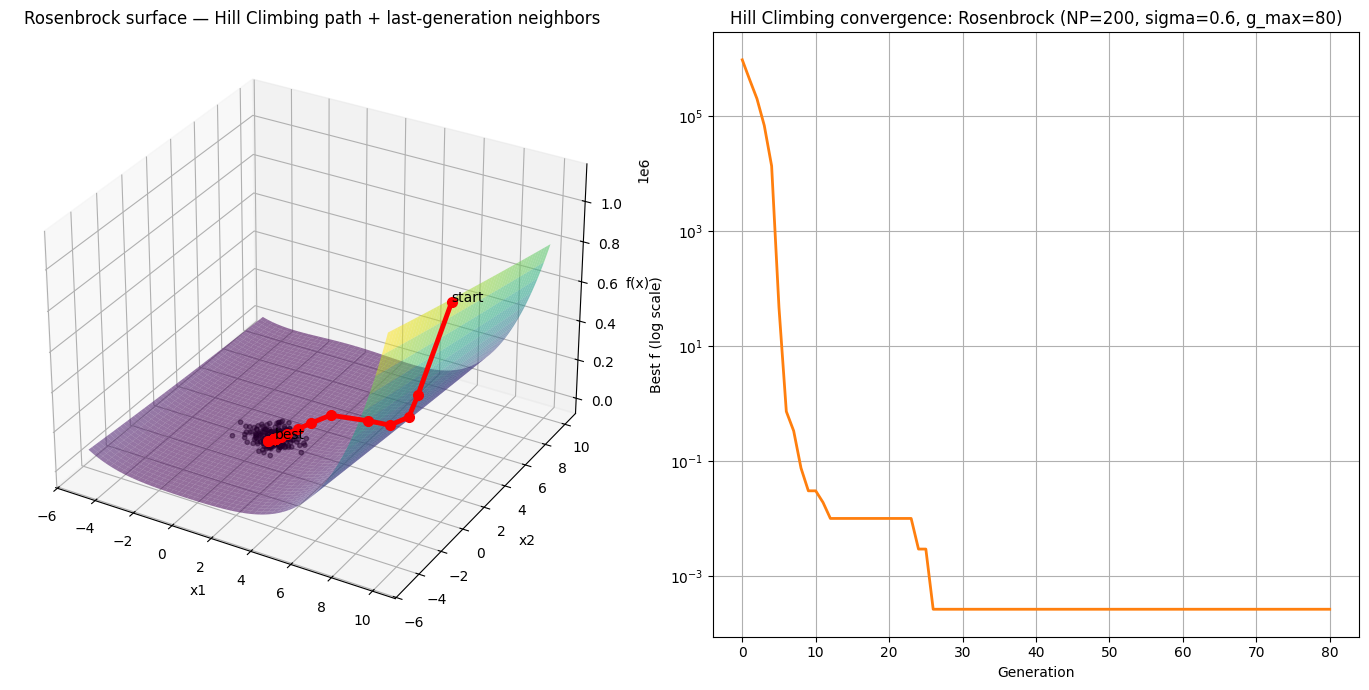

Best found: [1.00467713 1.00781701] f = 0.0002649601848586472


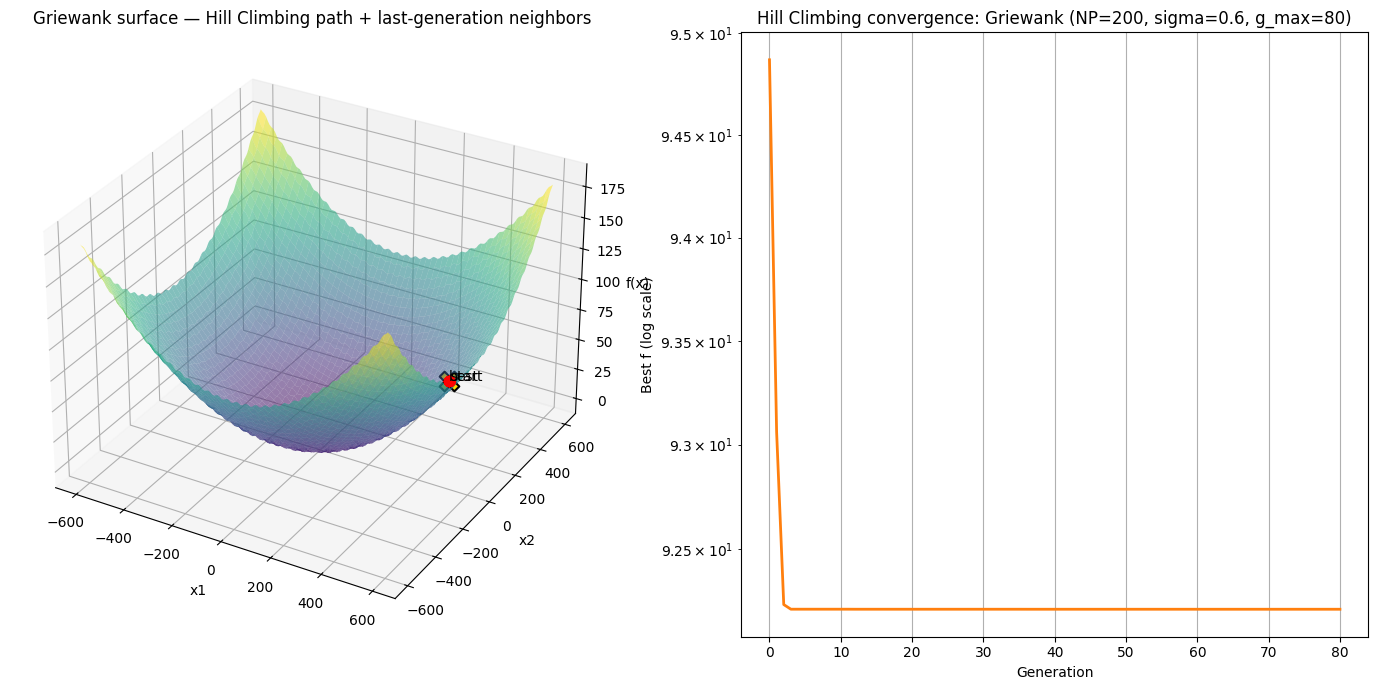

Best found: [ 590.32450743 -142.03024318] f = 92.21189568105748


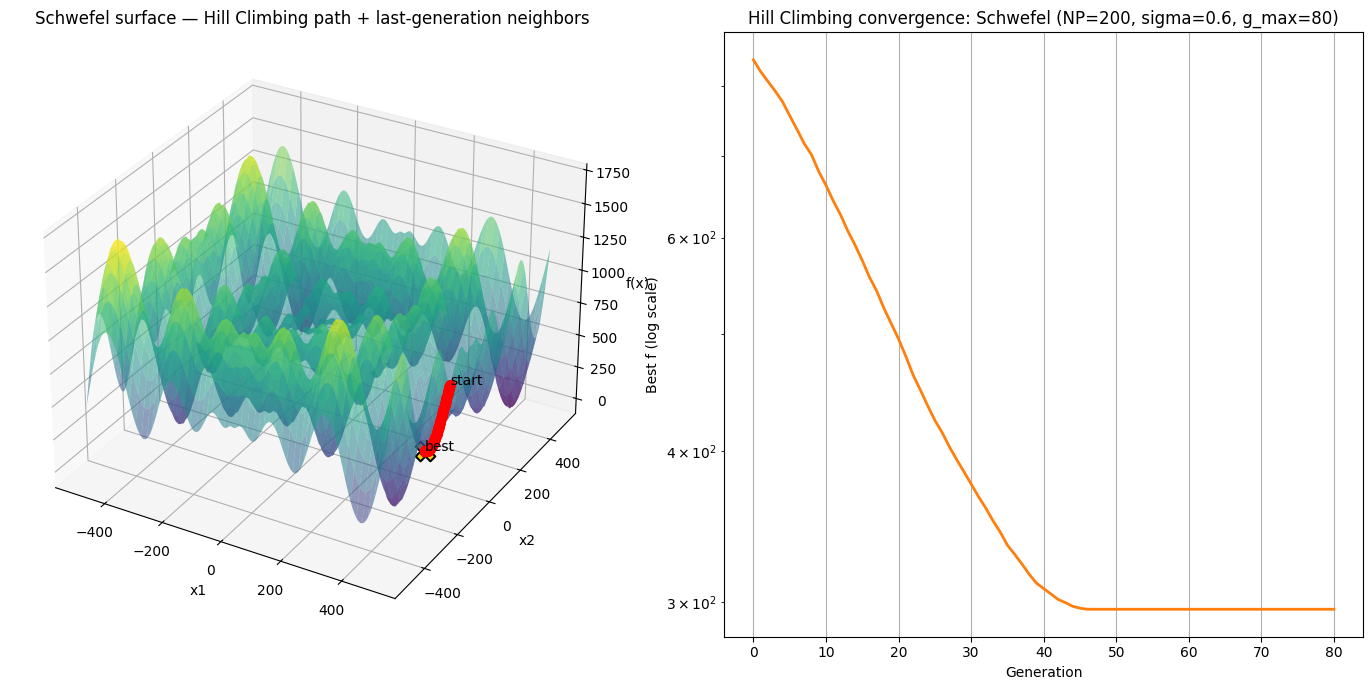

Best found: [ 420.97026705 -124.83544924] f = 296.10674429274286


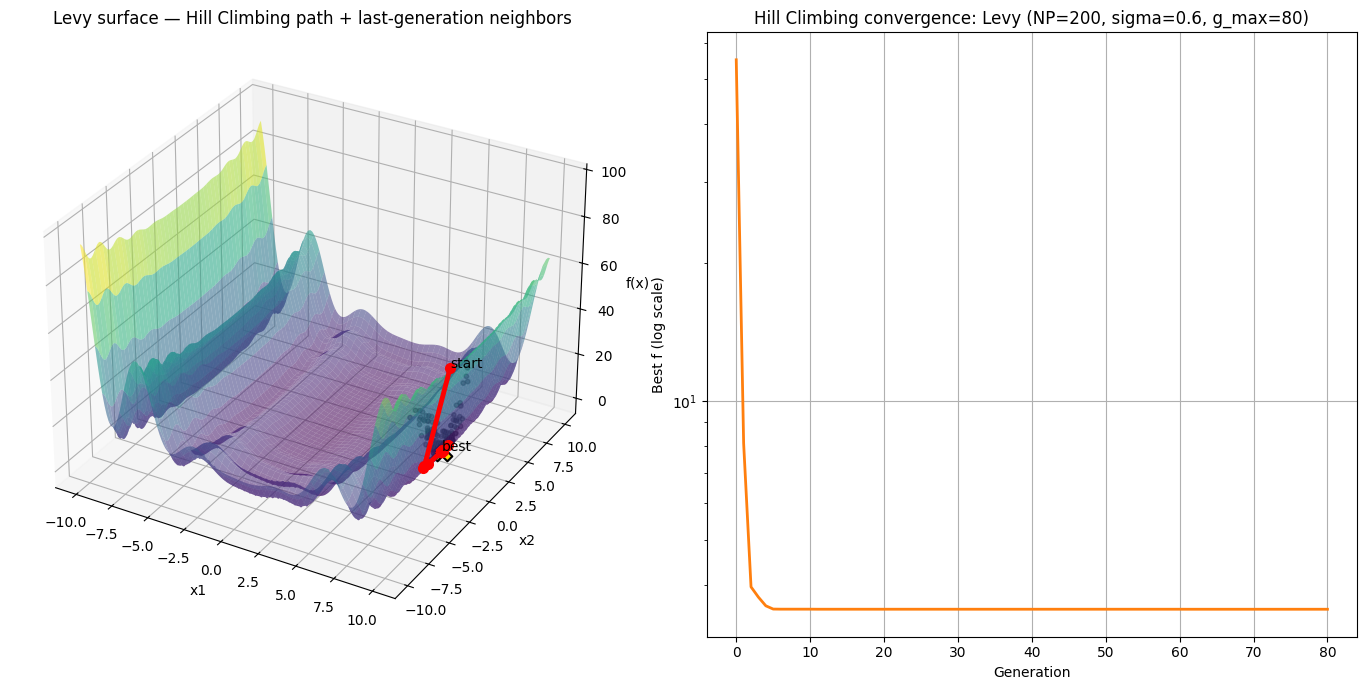

Best found: [7.72353313 0.99269684] f = 3.5359290326836064


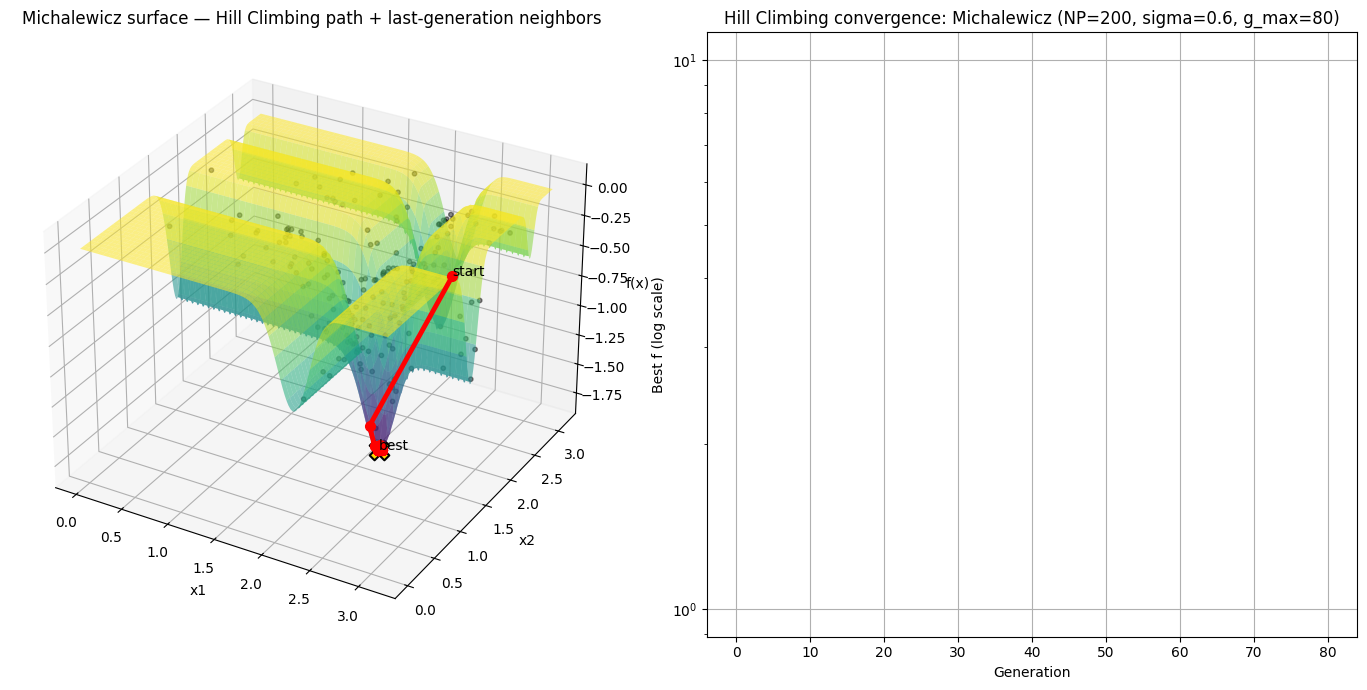

Best found: [2.20510594 1.56790698] f = -1.800887206842801


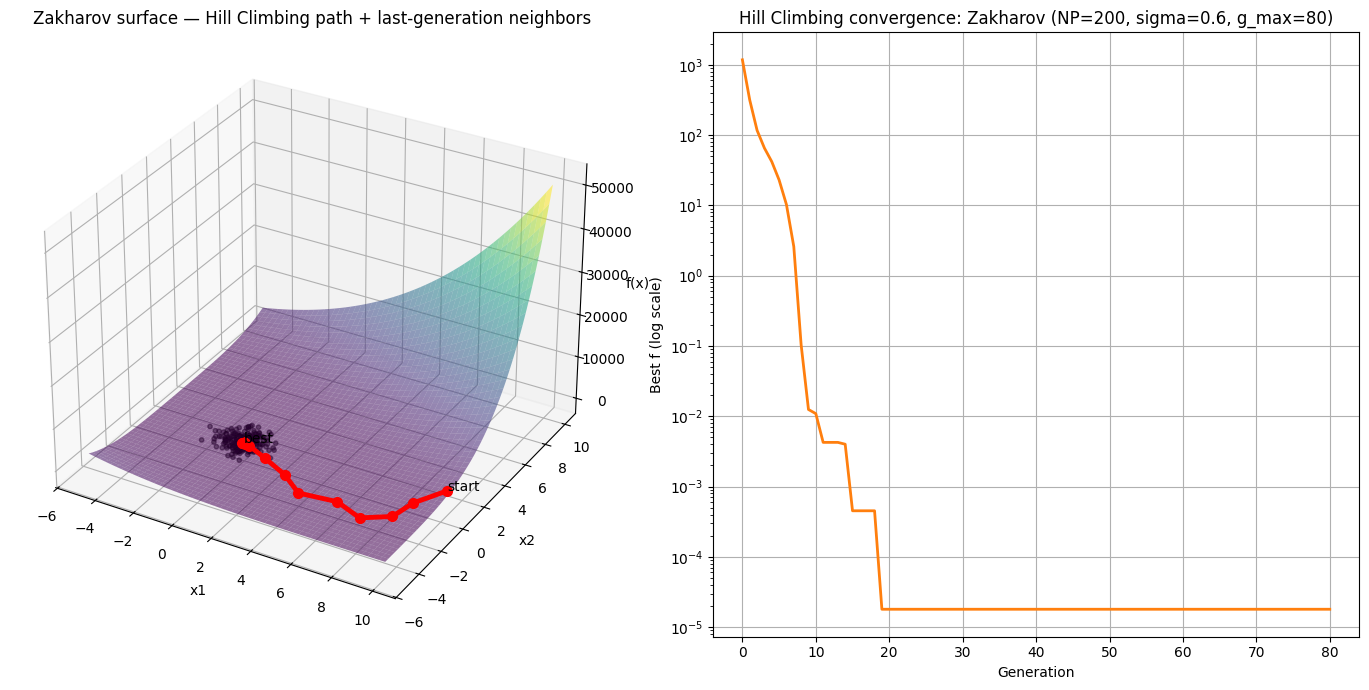

Best found: [0.0030309  0.00119457] f = 1.7957625670805073e-05


In [4]:
funcs = ["Sphere", "Ackley", "Rastrigin", "Rosenbrock", "Griewank", "Schwefel", "Levy", "Michalewicz", "Zakharov"]

# parameters
fn_name = "Rastrigin"
NP = 200            # neighbors per generation
g_max = 80          # generations
sigma = 0.6         # neighbor std dev (try different sizes: 0.1..1.5)
seed = 2025
grid = 160

for fn_name in funcs:
    bf = registry[fn_name]
    lb, ub = bf.bounds

    # run hill climbing
    hc = HillClimbing(func=bf.func, bounds=(lb, ub), NP=NP, sigma=sigma, g_max=g_max, seed=seed)
    best_x, best_f, history = hc.run(record_history=True)

    # prepare surface grid
    X, Y, Z = surface_grid(bf.func, lb, ub, grid_points=grid)

    # plotting - surface + path + last-generation neighbors
    fig = plt.figure(figsize=(14, 7))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')

    # surface and path (path will be visible on top)
    plot_surface_and_path(ax1, X, Y, Z, path_points=np.array(history["best_x"]), surf_alpha=0.55)

    # plot neighbors of the last generation (history["sampled"][-1]) to see local search region
    last_neighbors = history["sampled"][-1]  # shape (NP, d)
    plot_neighbors_on_surface(ax1, X, Y, Z, last_neighbors, marker='o', markersize=10, alpha=0.45, color='black')

    ax1.set_title(f"{fn_name} surface — Hill Climbing path + last-generation neighbors")
    ax1.set_xlabel("x1"); ax1.set_ylabel("x2"); ax1.set_zlabel("f(x)")

    # convergence
    ax2 = fig.add_subplot(1, 2, 2)
    plot_convergence(ax2, history["best_f"])
    ax2.set_title(f"Hill Climbing convergence: {fn_name} (NP={NP}, sigma={sigma}, g_max={g_max})")

    plt.tight_layout()
    plt.show()

    print("Best found:", best_x, "f =", best_f)